In [11]:
import numpy as np
from matplotlib import pyplot as plt, rcParams
import serpentTools

In [12]:
# resD = serpentTools.read('bigT3D.txt_res.m')
# resT = serpentTools.read('bigT3D_test.txt_res.m')
# resR = serpentTools.read('bigT3D_test_ref.txt_res.m')
# resW = serpentTools.read('bigT_FA1_2D.txt_res.m')

resREF = serpentTools.read('bigT_REF_2D.txt_res.m')

# print(resD.resdata['absKeff'])
# print("\n")
# print(resR.resdata['absKeff'])
# print("\n")
# print(resD.resdata['burnup'])

# burnup1 = np.zeros(len(resD.resdata['absKeff']))
# burnup2 = np.zeros(len(resR.resdata['absKeff']))
burnup3 = np.zeros(len(resREF.resdata['absKeff']))


# kbigT = np.zeros(len(resD.resdata['absKeff']))
kRef = np.zeros(len(resREF.resdata['absKeff']))
# kTest = np.zeros(len(resT.resdata['absKeff']))
# for i in range(0, len(resD.resdata['absKeff'])):
#     burnup1[i] = resD.resdata['burnup'][i][0]
#     kbigT[i] = resD.resdata['absKeff'][i][0]
    
for i in range(0, len(resREF.resdata['absKeff'])):
    kRef[i] = resREF.resdata['absKeff'][i][0]
    burnup3[i] = resREF.resdata['burnup'][i][0]
    
print(burnup3, kRef)
    

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  1.   2.   4.5  6.   8.5
 10.  12.5 14.  16.5 18.  20.  22.  24.  26.  28.  30.  32.  36.  40.
 44.  50. ] [1.42639  1.42626  1.42511  1.42588  1.42375  1.4225   1.42122  1.42209
 1.42168  1.42118  1.41441  1.39711  1.3876   1.36771  1.3558   1.33325
 1.3182   1.29102  1.27435  1.24897  1.22084  1.18748  1.15344  1.1121
 1.06563  1.01059  0.88644  0.725522 0.536183 0.319035]


In [13]:
# resD.plot({'absKeff': r'$k_{\infty}$'})

# resW.plot({'absKinf': r'$k_{\infty}$'})

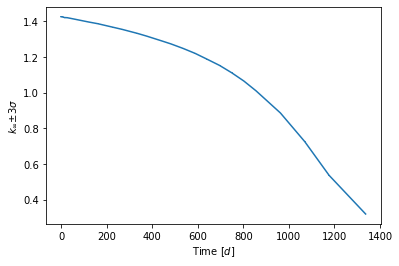

In [14]:
resREF.plot({'absKeff': r'$k_{\infty}$'})

In [15]:
kref = np.linspace(1.30, 1, 19)
bref = np.linspace(0.1, 30, 19)

slope = (1.13- 1.31625)/(14.1767 - 0.0202524)

def f(x):
    return slope*x + 1.31

KREF = f(bref)
print(KREF)

[1.30868435 1.28682985 1.26497536 1.24312087 1.22126638 1.19941189
 1.1775574  1.15570291 1.13384842 1.11199393 1.09013944 1.06828495
 1.04643046 1.02457597 1.00272148 0.98086699 0.9590125  0.93715801
 0.91530352]


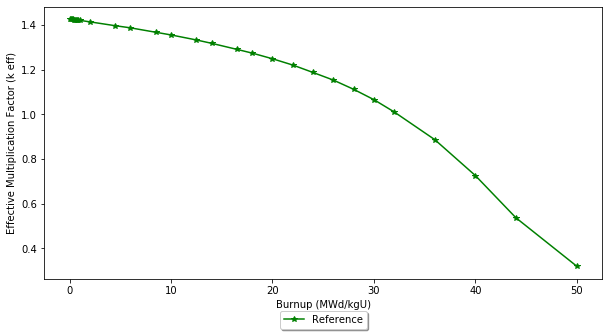

In [16]:
fig, (ax1) = plt.subplots(figsize=(10, 5));
plt.subplots_adjust(wspace=.5, hspace=.5);
ax1.set(xlabel = 'Burnup (MWd/kgU)', ylabel = 'Effective Multiplication Factor (k eff)');
ax1.plot(burnup3, kRef, 'g-*', label = 'Reference');
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()
